In [5]:
from bsp_epidemic_suppression_model.utilities.model import r0, FS
from bsp_epidemic_suppression_model.algorithm.model_blocks import (
    suppressed_r_from_test_cdf,
)
from bsp_epidemic_suppression_model.utilities.plotting_utils import plot_functions
from bsp_epidemic_suppression_model.utilities.functions_utils import RealRange
import scipy.integrate as integrate
from numpy import heaviside

In [2]:
tau_max = 30
step = 0.05

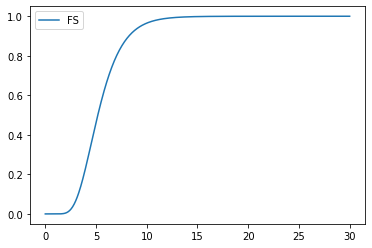

E(tauS) = 5.528321470814886


In [10]:
# Symptoms onset distribution
plot_functions([FS], RealRange(x_min=0, x_max=tau_max, step=step), labels=['FS'])
EtauS = integrate.quad(lambda tau: (1-FS(tau)), 0, tau_max)[0]  # Expected time of symptomes onset for symptomatics
print("E(tauS) =",EtauS)

### Symptoms-based only R suppression

suppressed R_0 = 0.5189375262875019


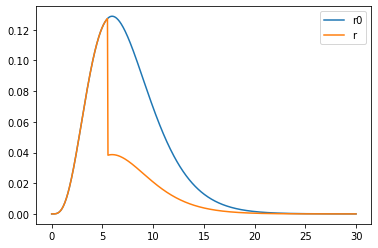

In [11]:
# Approximating FS as heaviside

tau_s = 5.52
FT = lambda tau: heaviside(tau - tau_s, 1)
xi = 0.7  # Probability of (immediate) isolation given positive test

suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)


suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])

suppressed R_0 = 0.5217335716523748


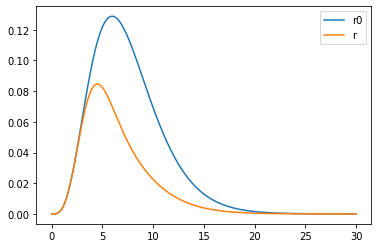

In [7]:
# Using true FS

FT = FS
xi = 0.7  # Probability of (immediate) isolation given positive test

suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)


suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])

### R suppression including ss and DeltaAT

suppressed R_0 = 0.606360346355806


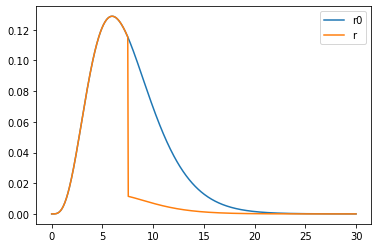

In [14]:
# Approximating FS as heaviside
tau_s = 5.52
Deltat_testapp=2
ss = 0.7

xi = 0.9  # Probability of (immediate) isolation given positive test

FT = lambda tau: heaviside(tau - tau_s - Deltat_testapp, 1)
suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)
suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])

suppressed R_0 = 0.7058817123602943


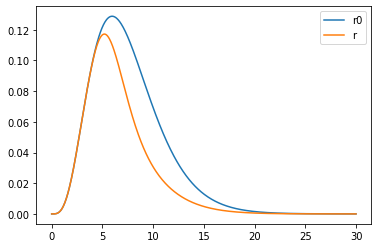

In [13]:
# Using true FS
Deltat_testapp=2
ss = 0.7

xi = 0.9  # Probability of (immediate) isolation given positive test

FT = lambda tau: ss * FS(tau - Deltat_testapp)
suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)
suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])